In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [35]:
# Source: https://scentellegher.github.io/visualization/2018/10/10/beautiful-bar-plots-matplotlib.html
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'

plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'

In [2]:
df = pd.read_csv('funding.csv')

In [3]:
df.head()

,Authors,Title,Link,Venue,Cites,Year,Method,Comments,Funding
0,"Menzies, T., & Pecheur, C.",Verification and validation and artificial int...,NaN,Advances in computers,60.0,2005.0,NaN,Discusses V&V methods in SE and AI in general,NASA
1,"Lakkaraju, H., Kamar, E., Caruana, R., & Horvi...",Identifying unknown unknowns in the open world...,https://arxiv.org/pdf/1610.09064.pdf,AAAI Conference on Artificial Intelligence.,62.0,2017.0,DSP + multi-armed bandit formulation,NaN,NaN
2,"Tjeng, V., Xiao, K., & Tedrake, R.",Evaluating robustness of neural networks with ...,https://arxiv.org/pdf/1711.07356.pdf,arXiv,102.0,2017.0,MILP,Needs a closer read; kind of tangential; discu...,"Lockheed, NSF"
3,"Kim, B., Gilmer, J., Wattenberg, M., & Viégas, F.",Tcav: Relative concept importance testing with...,https://openreview.net/pdf?id=S1viikbCW,ICLR,17.0,2018.0,concept vectors at each layer for explanation,Really cool paper,NaN
4,"Uesato, J., Kumar, A., Szepesvari, C., Erez, T...",Rigorous agent evaluation: An adversarial appr...,https://arxiv.org/pdf/1812.01647.pdf,arXiv,3.0,2018.0,use earlier iteration data to predict risk of ...,NaN,NaN


In [14]:
funding = df['Funding']

In [15]:
funding = funding[funding.notna()]

In [16]:
funding = [x.split(', ') for x in funding]

In [18]:
# From https://stackoverflow.com/a/952952/2713263
funding = [item for sublist in funding for item in sublist]

In [54]:
xy = { x: sum([y == x for y in funding]) for x in funding if x != 'Entirely non-US' }

In [55]:
x = sorted(xy, key=lambda x: xy[x])
y = [xy[i] for i in x]

In [70]:
idx = np.where(np.array(y) > 1)[0][0]  # where does it stop being 1

In [71]:
idx

29

<BarContainer object of 16 artists>

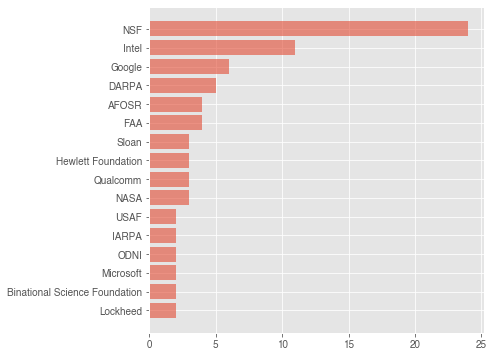

In [77]:
plt.figure(figsize=(6,6))
plt.barh(x[idx:], y[idx:], alpha=0.6)